In [ ]:
# import pandas as pd
# import numpy as np
# import random

# # Set random seed for reproducibility
# np.random.seed(42)
# random.seed(42)

# n_samples = 50000

# # Generate Vendor IDs
# vendor_ids = np.random.choice([f"V{str(i).zfill(5)}" for i in range(1, 501)], size=n_samples)

# # Purchase Order Amounts
# purchase_amounts = np.random.normal(loc=5000, scale=2000, size=n_samples).clip(1000, 10000)

# # Vendor Rating (1 to 5 stars)
# vendor_ratings = np.random.choice([1, 2, 3, 4, 5], size=n_samples, p=[0.1, 0.1, 0.2, 0.3, 0.3])

# # Procurement Lead Time (in days)
# lead_times = np.random.normal(loc=15, scale=5, size=n_samples).clip(5, 30)

# # Logic to define Approval Status
# approval_statuses = []
# for amt, rating, lead in zip(purchase_amounts, vendor_ratings, lead_times):
#     score = (rating * 2) - (lead / 10) - (amt / 10000)
#     if score > 6:
#         approval_statuses.append('Approved')
#     elif score > 4:
#         approval_statuses.append('Pending')
#     else:
#         approval_statuses.append('Rejected')

# # Assemble into a DataFrame
# procurement_df = pd.DataFrame({
#     "Date": pd.date_range(start="2023-01-01", periods=n_samples, freq="H"),
#     "Vendor_ID": vendor_ids,
#     "Purchase_Order_Amount": purchase_amounts.round(2),
#     "Approval_Status": approval_statuses,
#     "Vendor_Rating": vendor_ratings,
#     "Procurement_Lead_Time": lead_times.round(1)
# })

# # Save to CSV
# procurement_df.to_csv("procurement_data_smart.csv", index=False)

# print("✅ Data Generated Successfully: procurement_data_smart.csv")


✅ Data Generated Successfully: procurement_data_smart.csv


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the smart generated data
df = pd.read_csv("datasets/procurement_data_smart.csv")

# Features and Target
X = df.drop(columns=["Approval_Status", "Date", "Vendor_ID"])  # Drop non-predictive columns
y = df["Approval_Status"]

# Encode target labels (Approved → 0, Pending → 1, Rejected → 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into Train + Temp (80%) and Test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Split Temp into Validation (50%) and Test (50%) → so final split is 80% train / 10% val / 10% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"✅ Data Split Successfully: Train {X_train.shape}, Validation {X_val.shape}, Test {X_test.shape}")

✅ Data Split Successfully: Train (40000, 3), Validation (5000, 3), Test (5000, 3)


In [2]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize XGBoost Classifier with GPU
model = xgb.XGBClassifier(
    tree_method='gpu_hist',   # <<<<<< USE GPU
    predictor='gpu_predictor', 
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss',
    use_label_encoder=False
)

# Fit model with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# Predict on Test
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Test Accuracy: {acc * 100:.2f}%")

[0]	validation_0-mlogloss:1.06763
[1]	validation_0-mlogloss:1.04571
[2]	validation_0-mlogloss:1.01671
[3]	validation_0-mlogloss:0.99362


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:01:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:01:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[4]	validation_0-mlogloss:0.98890
[5]	validation_0-mlogloss:0.93372
[6]	validation_0-mlogloss:0.91402
[7]	validation_0-mlogloss:0.88637
[8]	validation_0-mlogloss:0.86033
[9]	validation_0-mlogloss:0.83256
[10]	validation_0-mlogloss:0.80921
[11]	validation_0-mlogloss:0.78443
[12]	validation_0-mlogloss:0.78149
[13]	validation_0-mlogloss:0.75323
[14]	validation_0-mlogloss:0.72855
[15]	validation_0-mlogloss:0.71461
[16]	validation_0-mlogloss:0.69310
[17]	validation_0-mlogloss:0.67823
[18]	validation_0-mlogloss:0.66611
[19]	validation_0-mlogloss:0.65369
[20]	validation_0-mlogloss:0.64023
[21]	validation_0-mlogloss:0.62478
[22]	validation_0-mlogloss:0.60414
[23]	validation_0-mlogloss:0.59119
[24]	validation_0-mlogloss:0.57975
[25]	validation_0-mlogloss:0.56604
[26]	validation_0-mlogloss:0.54240
[27]	validation_0-mlogloss:0.51796
[28]	validation_0-mlogloss:0.51649
[29]	validation_0-mlogloss:0.49577
[30]	validation_0-mlogloss:0.47805
[31]	validation_0-mlogloss:0.46582
[32]	validation_0-mlogloss

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:2676: UserWarning: [11:01:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:729: UserWarning: [11:01:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that

In [4]:
# Classification Report
from sklearn.metrics import accuracy_score, classification_report

print("\n📝 Classification Report:\n")
print(classification_report(y_test, y_pred))


📝 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2256
           1       0.99      0.99      0.99      1237
           2       1.00      1.00      1.00      1507

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



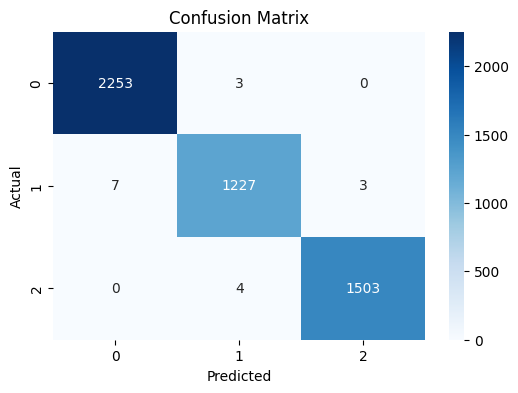

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [4]:
model.save_model("xgb_model.json")  # Save the model to a .json file

In [9]:
import joblib
import xgboost as xgb
joblib.dump(model, 'xgb_model.pkl')
print("Model saved as 'xgb_model.pkl'")

Model saved as 'xgb_model.pkl'


In [10]:

import joblib

# Load the trained model from the .pkl file
loaded_model = joblib.load('xgb_model.pkl')

# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Accuracy with the loaded model
acc_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"🎯 Loaded Model Accuracy: {acc_loaded * 100:.2f}%")

🎯 Loaded Model Accuracy: 99.66%


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:2676: UserWarning: [11:08:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


In [11]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Sample new data (10 rows)
new_data = {
    'Purchase_Order_Amount': [5000, 2500, 6500, 1200, 4500, 3400, 6000, 7000, 1500, 4000],
    'Vendor_Rating': [3, 5, 4, 2, 3, 1, 5, 4, 2, 3],
    'Procurement_Lead_Time': [10.5, 15.2, 12.3, 14.5, 9.8, 8.2, 16.0, 7.9, 18.4, 11.0]
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Load the previously trained model
loaded_model = xgb.XGBClassifier()
loaded_model.load_model("xgb_model.json")

# Feature columns to match with the training data
X_new = new_df[['Purchase_Order_Amount', 'Vendor_Rating', 'Procurement_Lead_Time']]

# Ensure label encoding is applied to the target column if needed
# In this case, let's assume we previously encoded 'Approval_Status'
# e.g., 0 = 'Rejected', 1 = 'Approved'

# Example: Actual labels for the new data (this is required for accuracy)
# You should replace this with your actual ground truth labels
actual_labels = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]  # Replace with your actual values

# Predict probabilities (confidence) for new data
y_pred_proba = loaded_model.predict_proba(X_new)

# Print predicted probabilities (confidence)
print("Predicted Probabilities (Confidence) on new data:")
for i, prob in enumerate(y_pred_proba):
    print(f"Row {i + 1}: {prob}")

# Predict on the new data (binary prediction: 0 or 1)
y_pred_new = loaded_model.predict(X_new)

# Calculate accuracy if actual labels are available
accuracy = (y_pred_new == actual_labels).mean()
print(f"\n🎯 Accuracy on new data: {accuracy * 100:.2f}%")

# Optionally, if you want to map predictions back to the original labels (e.g., 'Approved', 'Rejected')
le = LabelEncoder()
le.fit(['Rejected', 'Pending', 'Approved'])  # Ensure the same encoding as during training
y_pred_new_labels = le.inverse_transform(y_pred_new)

# Print the predicted approval statuses
print("\nPredicted Approval Statuses (Decoded):")
print(y_pred_new_labels)


Predicted Probabilities (Confidence) on new data:
Row 1: [1.5873110e-04 9.9934655e-01 4.9464748e-04]
Row 2: [9.9999976e-01 1.9125503e-07 9.0258673e-10]
Row 3: [9.8828006e-01 1.1719540e-02 3.6005216e-07]
Row 4: [3.0424356e-04 3.7172649e-04 9.9932408e-01]
Row 5: [2.9025088e-05 9.9992323e-01 4.7767830e-05]
Row 6: [2.9230905e-05 1.2352140e-04 9.9984717e-01]
Row 7: [9.9977285e-01 1.1014188e-04 1.1703295e-04]
Row 8: [9.9946541e-01 5.3444336e-04 1.7771752e-07]
Row 9: [6.0751058e-06 1.6425955e-05 9.9997747e-01]
Row 10: [9.8582386e-05 9.9959666e-01 3.0481801e-04]

🎯 Accuracy on new data: 20.00%

Predicted Approval Statuses (Decoded):
['Pending' 'Approved' 'Approved' 'Rejected' 'Pending' 'Rejected'
 'Approved' 'Approved' 'Rejected' 'Pending']
